In [93]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [94]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
df_test=pd.read_csv("C:/Users/91842/OneDrive/Desktop/House Prediction/test.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [96]:
df_train=pd.read_csv("C:/Users/91842/OneDrive/Desktop/House Prediction/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [99]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<AxesSubplot:>

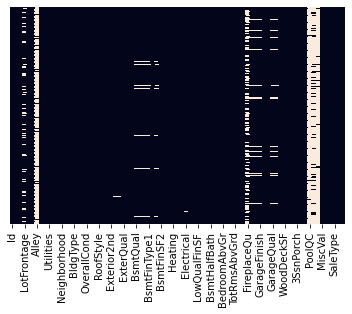

In [100]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

<AxesSubplot:>

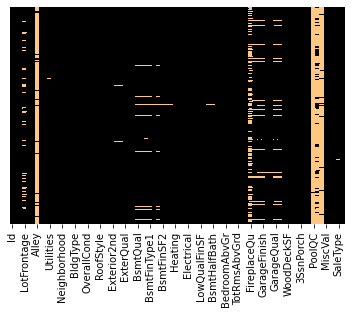

In [101]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='copper')

In [102]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [103]:
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [104]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())

In [105]:
df_train.drop(['Alley'],axis=1,inplace=True)
df_test.drop(['Alley'],axis=1,inplace=True)

In [106]:
df_train['ExterQual']=df_train['ExterQual'].fillna(df_train['ExterQual'].mode()[0])
df_test['ExterQual']=df_test['ExterQual'].fillna(df_test['ExterQual'].mode()[0])

In [107]:
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])

In [108]:
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_test['BsmtFinType1']=df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])

In [109]:
df_train['BsmtFinSF2']=df_train['BsmtFinSF2'].fillna(df_train['BsmtFinSF2'].mode()[0])
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mode()[0])

In [110]:
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])

In [111]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])

In [112]:
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])

In [113]:
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])

In [114]:
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])

In [115]:
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

In [116]:
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [117]:
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])

In [118]:
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_test['BsmtExposure']=df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])

In [119]:
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])
df_test['GarageYrBlt']=df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])

In [120]:
df_train.drop(['PoolQC'],axis=1,inplace=True)
df_test.drop(['PoolQC'],axis=1,inplace=True)

In [121]:
df_train.drop(['MiscFeature'],axis=1,inplace=True)
df_test.drop(['MiscFeature'],axis=1,inplace=True)

In [122]:
df_train.drop(['Fence'],axis=1,inplace=True)
df_test.drop(['Fence'],axis=1,inplace=True)

<AxesSubplot:>

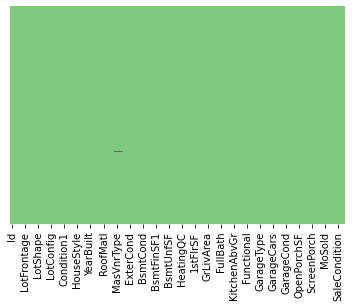

In [123]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='Accent')

<AxesSubplot:>

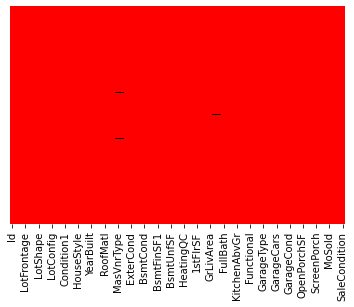

In [124]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='flag')

In [125]:
new_df_train=df_train.dropna()
new_df_test=df_test.dropna()

<AxesSubplot:>

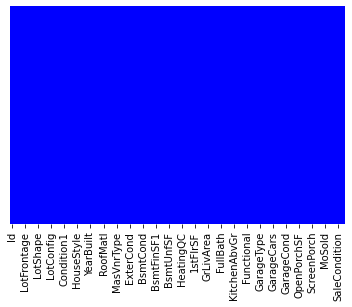

In [126]:
sns.heatmap(new_df_train.isnull(),yticklabels=False,cbar=False,cmap='winter')

<AxesSubplot:>

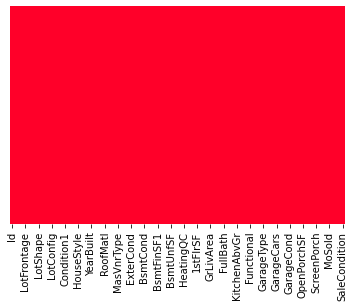

In [127]:
sns.heatmap(new_df_test.isnull(),yticklabels=False,cbar=False,cmap='gist_rainbow')

In [128]:
new_df_test.info()
new_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1431 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1431 non-null   int64  
 1   MSSubClass     1431 non-null   int64  
 2   MSZoning       1431 non-null   object 
 3   LotFrontage    1431 non-null   float64
 4   LotArea        1431 non-null   int64  
 5   Street         1431 non-null   object 
 6   LotShape       1431 non-null   object 
 7   LandContour    1431 non-null   object 
 8   Utilities      1431 non-null   object 
 9   LotConfig      1431 non-null   object 
 10  LandSlope      1431 non-null   object 
 11  Neighborhood   1431 non-null   object 
 12  Condition1     1431 non-null   object 
 13  Condition2     1431 non-null   object 
 14  BldgType       1431 non-null   object 
 15  HouseStyle     1431 non-null   object 
 16  OverallQual    1431 non-null   int64  
 17  OverallCond    1431 non-null   int64  
 18  YearBuil

In [129]:
new_df_test.shape

(1431, 76)

In [130]:
new_df_train.shape

(1451, 77)

In [131]:
final_df=pd.concat([new_df_train,new_df_test],axis=0)

In [132]:
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2882, dtype: float64

In [133]:
final_df.shape

(2882, 77)

In [134]:
final_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [135]:
final_df=pd.get_dummies(final_df)
final_df.shape

(2882, 277)

In [136]:
final_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=277)

In [137]:
final_df.drop_duplicates(subset=None,keep='first',inplace=False)
final_df.shape

(2882, 277)

In [138]:
print(final_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2882 entries, 0 to 1458
Columns: 277 entries, Id to SaleCondition_Partial
dtypes: float64(12), int64(26), uint8(239)
memory usage: 1.5 MB
None


In [139]:
train_df=final_df.iloc[:1441,:]
test_df=final_df.iloc[1441:,:]

In [140]:
train_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.000000,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.000000,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.000000,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.000000,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.000000,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,1446,85,70.000000,8400,6,5,1966,1966,0.0,187.0,...,0,0,0,1,0,0,0,0,1,0
1446,1447,20,70.049958,26142,5,7,1962,1962,189.0,593.0,...,0,0,0,1,0,0,0,0,1,0
1447,1448,60,80.000000,10000,8,5,1995,1996,438.0,1079.0,...,0,0,0,1,0,0,0,0,1,0
1448,1449,50,70.000000,11767,4,7,1910,2000,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [141]:
test_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1450,1451,90,60.0,9000,5,5,1974,1974,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1451,1452,20,78.0,9262,8,5,2008,2009,194.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547.0,...,0,0,0,1,0,0,0,0,1,0
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [142]:
train_x=train_df.drop(['SalePrice'],axis=1)
train_y=train_df['SalePrice']

In [143]:
train_y.shape

(1441,)

In [144]:
import xgboost
classifier=xgboost.XGBRegressor()

In [145]:
import xgboost
regressor=xgboost.XGBRegressor()


In [146]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [147]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [148]:
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [149]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [150]:
random_cv.fit(train_x,train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter

In [151]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [152]:
params=random_cv.best_params_
print(params)

{'n_estimators': 900, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.1, 'booster': 'gbtree', 'base_score': 0.25}


In [153]:
regressor=xgboost.XGBRegressor(n_estimators= 900, 
                               min_child_weight= 1, max_depth= 2,
                               learning_rate= 0.1,
                               booster= 'gbtree', 
                               base_score= 0.25)

In [154]:
regressor.fit(train_x,train_y)

XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [155]:
test_df.drop(['SalePrice'],axis=1).head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1450,1451,90,60.0,9000,5,5,1974,1974,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1451,1452,20,78.0,9262,8,5,2008,2009,194.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1452,1453,180,35.0,3675,5,5,2005,2005,80.0,547.0,...,0,0,0,1,0,0,0,0,1,0
1453,1454,20,90.0,17217,5,5,2006,2006,0.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1454,1455,20,62.0,7500,7,5,2004,2005,0.0,410.0,...,0,0,0,1,0,0,0,0,1,0


In [156]:
test_df.info

<bound method DataFrame.info of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1450  1451          90         60.0     9000            5            5   
1451  1452          20         78.0     9262            8            5   
1452  1453         180         35.0     3675            5            5   
1453  1454          20         90.0    17217            5            5   
1454  1455          20         62.0     7500            7            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
1

In [157]:
y_pred=regressor.predict(test_df.drop(['SalePrice'],axis=1))
y_pred

array([119252.92, 250371.4 , 128342.64, ..., 158306.94, 118262.46,
       228033.14], dtype=float32)

In [158]:
score = regressor.score(train_x, train_y)  
print("Training score: ", score)

Training score:  0.985365509537986


In [159]:
from sklearn.model_selection import cross_val_score, KFold
scores = cross_val_score(regressor, train_x, train_y,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.89


In [160]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(regressor, train_x, train_y, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.88


In [161]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(train_y,y_pred))

print (rmse)

112156.62661522532


In [162]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [163]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('C:/Users/91842/OneDrive/Desktop/House Prediction/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission2.csv',index=False)


In [164]:
datasets.shape

(1459, 2)